In [1]:
import tensorflow as tf
from keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt


In [2]:

data_dir = "./utkface_aligned_cropped/UTKFace"
images = []
ages = []

for file in os.listdir(data_dir):
    if file.endswith(".jpg"):
        age = int(file.split("_")[0])  # Extract age from filename
        img_path = os.path.join(data_dir, file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))  
        images.append(img)
        ages.append(age)


images = np.array(images) / 255.0  # Normalize pixel values to [0, 1]
ages = np.array(ages)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(images, ages, test_size=0.2, random_state=42)


In [4]:
base_model = Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(128, 128, 3)
)

In [5]:
top_layer = Dense(1)(Dense(512, activation='relu')(GlobalAveragePooling2D()(base_model.output)))
model = Model(base_model.input, top_layer)

In [6]:
for layer in base_model.layers:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error',  
    metrics=['mae'] 
)

In [7]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=20,
    verbose=1
)

Epoch 1/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 372s 617ms/step - loss: 257.5069 - mae: 11.6528 - val_loss: 155.7939 - val_mae: 8.8880
Epoch 2/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 369s 623ms/step - loss: 139.6717 - mae: 8.6407 - val_loss: 148.1933 - val_mae: 8.6012
Epoch 3/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 362s 610ms/step - loss: 126.0814 - mae: 8.1789 - val_loss: 146.8333 - val_mae: 8.7008
Epoch 4/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 347s 584ms/step - loss: 119.8662 - mae: 7.9666 - val_loss: 150.7649 - val_mae: 8.6172
Epoch 5/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 349s 589ms/step - loss: 115.7730 - mae: 7.8527 - val_loss: 138.4396 - val_mae: 8.4133
Epoch 6/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 350s 590ms/step - loss: 107.5658 - mae: 7.5709 - val_loss: 138.3175 - val_mae: 8.4723
Epoch 7/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 345s 582ms/step - loss: 103.0938 - mae: 7.4014 - val_loss: 137.6935 - val_mae: 8.3692
Epoch 8/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 345s 582ms/step - loss: 102.9269 - mae: 7.4387 - val_loss: 138.4008 - val_mae

In [8]:

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")


149/149 - 68s - 455ms/step - loss: 146.2518 - mae: 8.7640
Test Loss (MSE): 146.2517852783203
Test MAE: 8.763976097106934


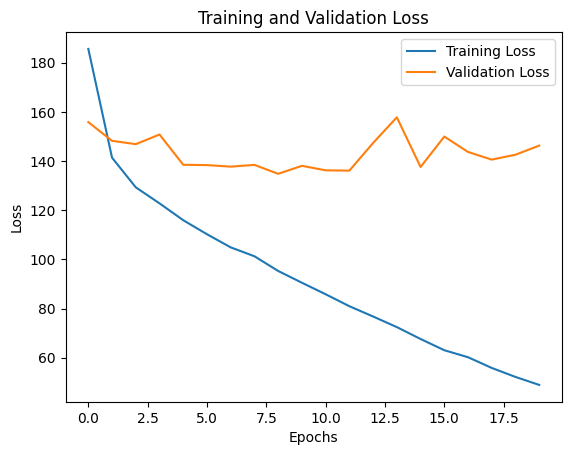

In [9]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


149/149 ━━━━━━━━━━━━━━━━━━━━ 75s 486ms/step


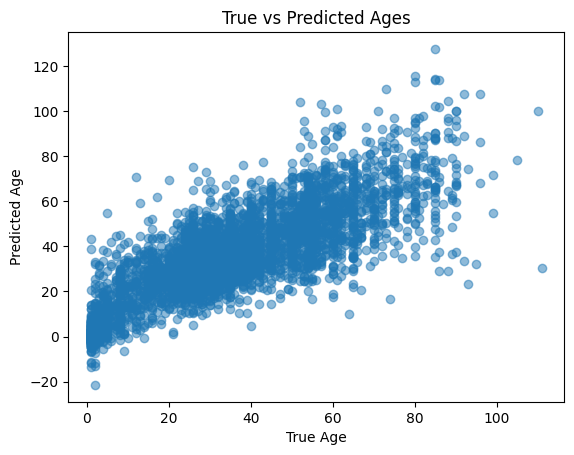

In [10]:
# Predict on the test set
predictions = model.predict(X_test)

# Plot true vs predicted ages
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("True Age")
plt.ylabel("Predicted Age")
plt.title("True vs Predicted Ages")
plt.show()
